In [169]:
#load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import mpmath as mp

# here I load output from UNPERTURBED (model) run (from all_twiss_unperturbed.out file) 

In [170]:
#just declaring a list for each column (twiss parameters)
element_name,element_type,s,betx,bety,mux,muy, K1L, L = [],[],[],[],[],[],[],[],[]

#open tfs file with UNPERTURBED DATA and read line by line, store each line as a string in a list
filename = "/Users/sebastiankalos/Documents/CERN_2021/forSebastian/output/all_twiss_unperturbed.out"
copy_lines=[]
with open(filename) as f:
    lines = f.readlines()

for line in lines:
    split_line = line.split()
    copy_lines.append(split_line)

#from each line, extract a name/number and append it into its relevant column
for i in range(48,len(copy_lines)-1): #49th line in the file is the first relevant one
    line = copy_lines[i]

    element_name.append(line[0].strip('"')) #strip element name and type of commas
    element_type.append(line[1].strip('"'))
    s.append(line[2])
    betx.append(line[3])
    mux.append(line[5])
    bety.append(line[6])
    muy.append(line[8])
    K1L.append(line[38])
    L.append(line[34])

#extracted values are strings --> cast numbers to floats
for i in range(0, len(element_name)):
    s[i] = float(s[i])
    betx[i] = float(betx[i])
    bety[i] = float(bety[i])
    mux[i] = float(mux[i])
    muy[i] = float(muy[i])
    K1L[i] = float(K1L[i])
    L[i] = float(L[i])

In [171]:
#create a dataframe that will contain all important info - name of place in an LHC sequence, beta functions, phases, fields, etc... of the PERTURBED version
d = {'name': element_name, 'element type': element_type, 's': s, 'BETX': betx, 'MUX': mux, 'BETY': bety, 'MUY': muy, 'K1L': K1L, 'field error': [0] * len(element_name), 'L': L}
df = pd.DataFrame(data=d) #df is the UNPERTURBED (model) version of twiss parameters
df.head() #show header of the dataframe

,name,element type,s,BETX,MUX,BETY,MUY,K1L,field error,L
0,LHCB1$START,MARKER,0.000,0.400000,0.000000,0.400000,0.000000,0.0,0,0.00
1,IP1,MARKER,0.000,0.400000,0.000000,0.400000,0.000000,0.0,0,0.00
2,MBAS2.1R1,SOLENOID,1.500,6.025003,0.208524,6.025003,0.208524,0.0,0,3.00
3,DRIFT_0,DRIFT,11.025,304.276545,0.244228,304.276666,0.244228,0.0,0,16.05
4,TAS.1R1,RCOLLIMATOR,19.950,995.406151,0.246809,995.406577,0.246809,0.0,0,1.80


# Here I load the all_twiss.out file - the PERTURBED version!

In [172]:
#just declaring a list for each column (twiss parameters, PERTURBED version)
element_name_perturb,element_type_perturb,s_perturb,betx_perturb,bety_perturb,mux_perturb,muy_perturb, K1L_perturb, L_perturb = [],[],[],[],[],[],[],[],[]

#open tfs file with PERTURBED DATA and read line by line, store each line as a string in a list
filename = "/Users/sebastiankalos/Documents/CERN_2021/forSebastian/output/all_twiss.out"
copy_lines=[]
with open(filename) as f:
    lines = f.readlines()

for line in lines:
    split_line = line.split()
    copy_lines.append(split_line)

#from each line, extract a name/number and append it into its relevant column
for i in range(48,len(copy_lines)-1): #49th line in the file is the first relevant one
    line = copy_lines[i]

    element_name_perturb.append(line[0].strip('"')) #strip element name and type of commas
    element_type_perturb.append(line[1].strip('"'))
    s_perturb.append(line[2])
    betx_perturb.append(line[3])
    mux_perturb.append(line[5])
    bety_perturb.append(line[6])
    muy_perturb.append(line[8])
    K1L_perturb.append(line[38])
    L_perturb.append(line[34])

#extracted values are strings --> cast numbers to floats
for i in range(0, len(element_name_perturb)):
    s_perturb[i] = float(s_perturb[i])
    betx_perturb[i] = float(betx_perturb[i])
    bety_perturb[i] = float(bety_perturb[i])
    mux_perturb[i] = float(mux_perturb[i])
    muy_perturb[i] = float(muy_perturb[i])
    K1L_perturb[i] = float(K1L_perturb[i])
    L_perturb[i] = float(L_perturb[i])

# here I load output from run with assigned field errors (from twiss tfs file) 

In [173]:
#create a dataframe that will contain all important info - name of place in an LHC sequence, beta functions, phases, fields, etc... of the PERTURBED version
d = {'name': element_name_perturb, 'element type': element_type_perturb, 's': s_perturb, 'BETX': betx_perturb, 'MUX': mux_perturb, 'BETY': bety_perturb, 'MUY': muy_perturb, 'K1L': K1L_perturb, 'field error': [0] * len(element_name_perturb), 'L': L_perturb}
df_perturb = pd.DataFrame(data=d)
df_perturb.head()

,name,element type,s,BETX,MUX,BETY,MUY,K1L,field error,L
0,LHCB1$START,MARKER,0.000,0.401300,0.000000,0.402467,0.000000,0.0,0,0.00
1,IP1,MARKER,0.000,0.401300,0.000000,0.402467,0.000000,0.0,0,0.00
2,MBAS2.1R1,SOLENOID,1.500,6.011216,0.208240,5.996183,0.208121,0.0,0,3.00
3,DRIFT_0,DRIFT,11.025,303.316566,0.244043,302.439851,0.244023,0.0,0,16.05
4,TAS.1R1,RCOLLIMATOR,19.950,992.226131,0.246633,989.352150,0.246620,0.0,0,1.80


In [174]:
criterion1 = df['element type'] == "MONITOR" #element needs to be a BPM monitor
criterion2 = df['name'].map(lambda name: name.endswith('.B1')) #element name needs to end with ".B1"
criterion3 = df['name'].map(lambda name: name.startswith('BPM')) # element name needs to start with "BPM"

BPMs = df.loc[(criterion1) & (criterion2) & (criterion3)] #extract dataframe with BPMs only (UNPERTURBED version, need to satisfy criteria above)

mux = BPMs['MUX'].tolist() #cast UNPERTURBED phase readings into a list and then to array
muy = BPMs['MUY'].tolist()
mux = np.array(mux)
muy = np.array(muy)

BPMs_s = BPMs['s'].tolist() #extract a list of s only corresponding to picked BPMs

BPMs_perturb = df_perturb.loc[(criterion1) & (criterion2) & (criterion3)] #extract dataframe with BPMs only (PERTURBED version, need to satisfy criteria above)

mux_perturb = BPMs_perturb['MUX'].tolist() #cast PERTURBED phase readings into a list
muy_perturb = BPMs_perturb['MUY'].tolist()

# get an array of phase advances between consecutive BPMs for UNPERTURBED sequence and cast it into an array
x_advance = []
y_advance = []
for i in range(1,len(mux)):
    x_advance.append(mux[i]-mux[i-1])
for i in range(1,len(muy)):
    y_advance.append(muy[i]-muy[i-1])
x_advance=np.array(x_advance)
y_advance=np.array(y_advance)

# get an array of phase advances between consecutive BPMs - from sequence with field errors
x_advance_perturb = []
y_advance_perturb = []
for i in range(1,len(mux_perturb)):
    x_advance_perturb.append(mux_perturb[i]-mux_perturb[i-1])
for i in range(1,len(muy_perturb)):
    y_advance_perturb.append(muy_perturb[i]-muy_perturb[i-1])
x_advance_perturb=np.array(x_advance_perturb)
y_advance_perturb=np.array(y_advance_perturb)

# compute the difference between phase advance with and without field errors between consecutive BPMs
x_advance_diff = x_advance_perturb - x_advance
y_advance_diff = y_advance_perturb - y_advance

# compute the phase difference (ABSOLUTE) between unperturbed sequence and one with errors
mux_perturb = np.array(mux_perturb)
muy_perturb = np.array(muy_perturb)
mux_diff = mux_perturb-mux
muy_diff = muy_perturb-muy

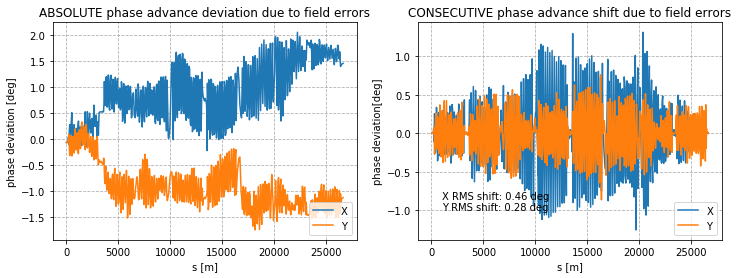

In [175]:
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(12, 4)) #initialize a double plot

#first plot - absolute phase difference
plt1.plot(BPMs_s, mux_diff*360, label='X')
plt1.plot(BPMs_s, muy_diff*360, label='Y')
plt1.legend(loc="lower right")
plt1.grid(linestyle='--')
plt1.set_xlabel('s [m]')
plt1.set_ylabel('phase deviation [deg]')
plt1.set_title('ABSOLUTE phase advance deviation due to field errors')

#second plot - consecutive phace advance shift
plt2.plot(BPMs_s[1:], x_advance_diff*360, label='X')
plt2.plot(BPMs_s[1:], y_advance_diff*360, label='Y')
plt2.legend(loc="lower right")
plt2.grid(linestyle='--')
plt2.set_xlabel('s [m]')
plt2.set_ylabel('phase deviation[deg]')
plt2.set_title('CONSECUTIVE phase advance shift due to field errors')

#get RMS values in degs (for consecutive phase advance)
rms_shift_x = np.sqrt(np.sum(np.square(x_advance_diff*360))/len(x_advance_diff*360))
rms_shift_y = np.sqrt(np.sum(np.square(y_advance_diff*360))/len(y_advance_diff*360))

#display RMS values in the plot
in_plot_text = "X RMS shift: {:.2f} deg\nY RMS shift: {:.2f} deg".format(rms_shift_x, rms_shift_y)
plt2.text(1000, -1, in_plot_text, fontsize=10)
plt.savefig('lhc_phase_advance_shift.png', dpi=300)

In [176]:
BPMs.head()

,name,element type,s,BETX,MUX,BETY,MUY,K1L,field error,L
6,BPMSW.1R1.B1,MONITOR,21.5640,1162.915119,0.247048,1162.915621,0.247048,0.0,0,0.0
11,BPMWF.A1R1.B1,MONITOR,21.7240,1180.230317,0.247070,1180.230826,0.247070,0.0,0,0.0
18,BPMS.2R1.B1,MONITOR,31.5290,1468.739420,0.248122,3885.798119,0.247885,0.0,0,0.0
44,BPMSY.4R1.B1,MONITOR,58.3145,5184.482583,0.249774,2477.792157,0.249029,0.0,0,0.0
68,BPMWB.4R1.B1,MONITOR,151.0945,858.778760,0.256774,1285.722178,0.257306,0.0,0,0.0


In [177]:
def get_PHI_meas(BPM_i_name, BPM_j_name, BPM_k_name, BPM_l_name, df, df_perturb):
    #################################################
    # i UNPERTURBED phase:
    BPM_i_indices = df.index[df["name"] == BPM_i_name]
    BPM_i_index = BPM_i_indices.tolist()
    BPM_i_phase_x = df.loc[BPM_i_index[0], 'MUX']
    BPM_i_phase_y = df.loc[BPM_i_index[0], 'MUY']

    # j UNPERTURBED phase:
    BPM_j_indices = df.index[df["name"] == BPM_j_name]
    BPM_j_index = BPM_j_indices.tolist()
    BPM_j_phase_x = df.loc[BPM_j_index[0], 'MUX']
    BPM_j_phase_y = df.loc[BPM_j_index[0], 'MUY']

    # k UNPERTURBED phase:
    BPM_k_indices = df.index[df["name"] == BPM_k_name]
    BPM_k_index = BPM_k_indices.tolist()
    BPM_k_phase_x = df.loc[BPM_k_index[0], 'MUX']
    BPM_k_phase_y = df.loc[BPM_k_index[0], 'MUY']

    # l UNPERTURBED phase:
    BPM_l_indices = df.index[df["name"] == BPM_l_name]
    BPM_l_index = BPM_l_indices.tolist()
    BPM_l_phase_x = df.loc[BPM_l_index[0], 'MUX']
    BPM_l_phase_y = df.loc[BPM_l_index[0], 'MUY']

    #################################################

    # i PERTURBED phase:
    BPM_i_indices = df_perturb.index[df_perturb["name"] == BPM_i_name]
    BPM_i_index = BPM_i_indices.tolist()
    BPM_i_phase_x_perturb = df_perturb.loc[BPM_i_index[0], 'MUX']
    BPM_i_phase_y_perturb = df_perturb.loc[BPM_i_index[0], 'MUY']

    # j PERTURBED phase:
    BPM_j_indices = df_perturb.index[df_perturb["name"] == BPM_j_name]
    BPM_j_index = BPM_j_indices.tolist()
    BPM_j_phase_x_perturb = df_perturb.loc[BPM_j_index[0], 'MUX']
    BPM_j_phase_y_perturb = df_perturb.loc[BPM_j_index[0], 'MUY']

    # k PERTURBED phase:
    BPM_k_indices = df_perturb.index[df_perturb["name"] == BPM_k_name]
    BPM_k_index = BPM_k_indices.tolist()
    BPM_k_phase_x_perturb = df_perturb.loc[BPM_k_index[0], 'MUX']
    BPM_k_phase_y_perturb = df_perturb.loc[BPM_k_index[0], 'MUY']

    # l PERTURBED phase:
    BPM_l_indices = df_perturb.index[df_perturb["name"] == BPM_l_name]
    BPM_l_index = BPM_l_indices.tolist()
    BPM_l_phase_x_perturb = df_perturb.loc[BPM_l_index[0], 'MUX']
    BPM_l_phase_y_perturb = df_perturb.loc[BPM_l_index[0], 'MUY']


    #################################################

    # simple model (unperturbed) phase advances X
    phi_jl_mod_x = (BPM_l_phase_x - BPM_j_phase_x)*2*np.pi#modeled phase advance [rad] between BPM j and l
    phi_jk_mod_x = (BPM_k_phase_x - BPM_j_phase_x)*2*np.pi#modeled phase advance [rad] between BPM j and k
    phi_ik_mod_x = (BPM_k_phase_x - BPM_i_phase_x)*2*np.pi#modeled phase advance [rad] between BPM i and k
    phi_il_mod_x = (BPM_l_phase_x - BPM_i_phase_x)*2*np.pi#modeled phase advance [rad] between BPM i and l

    # simple model (unperturbed) phase advances Y
    phi_jl_mod_y = (BPM_l_phase_y - BPM_j_phase_y)*2*np.pi#modeled phase advance [rad] between BPM j and l
    phi_jk_mod_y = (BPM_k_phase_y - BPM_j_phase_y)*2*np.pi#modeled phase advance [rad] between BPM j and k
    phi_ik_mod_y = (BPM_k_phase_y - BPM_i_phase_y)*2*np.pi#modeled phase advance [rad] between BPM i and k
    phi_il_mod_y = (BPM_l_phase_y - BPM_i_phase_y)*2*np.pi#modeled phase advance [rad] between BPM i and l

    #################################################

    # phase beating X
    delta_phi_jl_x = ((BPM_l_phase_x_perturb - BPM_j_phase_x_perturb)*2*np.pi-phi_jl_mod_x)# phase advance beating [rad] between BPM j and l
    delta_phi_jk_x = ((BPM_k_phase_x_perturb - BPM_j_phase_x_perturb)*2*np.pi-phi_jk_mod_x)# phase advance beating [rad] between BPM j and k
    delta_phi_ik_x = ((BPM_k_phase_x_perturb - BPM_i_phase_x_perturb)*2*np.pi-phi_ik_mod_x)# phase advance beating [rad] between BPM i and k
    delta_phi_il_x = ((BPM_l_phase_x_perturb - BPM_i_phase_x_perturb)*2*np.pi-phi_il_mod_x)# phase advance beating [rad] between BPM i and l

    # phase beating Y
    delta_phi_jl_y = ((BPM_l_phase_y_perturb - BPM_j_phase_y_perturb)*2*np.pi-phi_jl_mod_y)# phase advance beating [rad] between BPM j and l
    delta_phi_jk_y = ((BPM_k_phase_y_perturb - BPM_j_phase_y_perturb)*2*np.pi-phi_jk_mod_y)# phase advance beating [rad] between BPM j and k
    delta_phi_ik_y = ((BPM_k_phase_y_perturb - BPM_i_phase_y_perturb)*2*np.pi-phi_ik_mod_y)# phase advance beating [rad] between BPM i and k
    delta_phi_il_y = ((BPM_l_phase_y_perturb - BPM_i_phase_y_perturb)*2*np.pi-phi_il_mod_y)# phase advance beating [rad] between BPM i and l

    #calculate and return measured local observable (as per A.Wegscheider: https://journals.aps.org/prab/abstract/10.1103/PhysRevAccelBeams.23.054002)
    #X
    PHI_meas_x = (mp.cot(phi_jl_mod_x) * delta_phi_jl_x) - (mp.cot(phi_jk_mod_x) * delta_phi_jk_x) + (mp.cot(phi_ik_mod_x) * delta_phi_ik_x) - (mp.cot(phi_il_mod_x) * delta_phi_il_x) 
    #X
    PHI_meas_y = (mp.cot(phi_jl_mod_y) * delta_phi_jl_y) - (mp.cot(phi_jk_mod_y) * delta_phi_jk_y) + (mp.cot(phi_ik_mod_y) * delta_phi_ik_y) - (mp.cot(phi_il_mod_y) * delta_phi_il_y) 

    return([PHI_meas_x, PHI_meas_y])

# Here I load all_err.file that contains assigned field errors - I need to assign field errors into my dataframe!

In [178]:
#just declaring a list for each column
name_field_err = []
field_err = []

#open all_err.file and read line by line, store each line as a string in a list
filename = "/Users/sebastiankalos/Documents/CERN_2021/forSebastian/output/all_err.file"
copy_lines=[]
with open(filename) as f:
    lines = f.readlines()

for line in lines:
    split_line = line.split()
    copy_lines.append(split_line)

#from each line, extract a name/number and append it into its relevant column
for i in range(8,len(copy_lines)-1): #9th line in the file is the first relevant one
    line = copy_lines[i]

    name_field_err.append(line[0].strip('"')) #strip the name of the quotes
    field_err.append(line[3])

#extracted values are strings --> cast numbers to floats
for i in range(0, len(field_err)):
    field_err[i] = float(field_err[i])

In [179]:
#create a dataframe, this time only with element names and their corresponding field errors
d_err = {'name': name_field_err, 'field error': field_err}
df_err = pd.DataFrame(data=d_err)
non_zero_errs = df_err.loc[df_err['field error'] != 0] #extract dataframe that only includes elements with non-zero field error values

# Now I'll combine the two dataframes - Field errors in the main one will be updated from the one containing only element names and their errors

In [180]:
for i in non_zero_errs.index: #iterate over the non-zero field error elements and update the main PERTURBED dataframe accordingly
    element_name = non_zero_errs['name'][i]
    element_err = non_zero_errs['field error'][i]

    index = df_perturb.index
    element_indices = index[df["name"] == element_name]

    element_index = element_indices.tolist()
    df_perturb.at[element_index, 'field error'] = element_err

In [181]:
df_perturb.loc[df_perturb['field error'] != 0].head() #display a few rows of elements with non-zero field error values

,name,element type,s,BETX,MUX,BETY,MUY,K1L,field error,L
46,MBXW.A4R1,RBEND,61.322,4970.807640,0.249701,2418.034507,0.249050,0.0,2.438158e-08,3.4
48,MBXW.B4R1,RBEND,65.588,4698.082699,0.249842,2355.480700,0.249334,0.0,8.927610e-08,3.4
50,MBXW.C4R1,RBEND,69.854,4433.056681,0.249990,2293.763093,0.249627,0.0,-3.728871e-08,3.4
52,MBXW.D4R1,RBEND,74.120,4175.732966,0.250148,2232.880013,0.249927,0.0,7.868964e-08,3.4
54,MBXW.E4R1,RBEND,78.386,3926.109046,0.250316,2172.832820,0.250235,0.0,-1.388564e-08,3.4


# Now I should be ready to calculate Model observable (PHI_mod)

In [182]:
def get_h_bar(BPM_i_name, BPM_j_name, df, df_perturb):
    bits_x = []
    bits_y = []
    
    BPM_i_indices = df.index[df["name"] == BPM_i_name]
    BPM_i_index = BPM_i_indices.tolist()

    BPM_j_indices = df.index[df["name"] == BPM_j_name]
    BPM_j_index = BPM_j_indices.tolist()

    BPM_j_phase_x = df.loc[BPM_j_index[0], 'MUX']
    BPM_j_phase_y = df.loc[BPM_j_index[0], 'MUY']

    for w in range(BPM_i_index[0], BPM_j_index[0]):
        beta_w_mod_x = df.loc[w, 'BETX']
        beta_w_mod_y = df.loc[w, 'BETY']

        delta_K1L = df_perturb.loc[w, 'field error'] #the only bit that goes from PERTURBED version!

        phi_w_mod_x = df.loc[w, 'MUX']
        phi_w_mod_y = df.loc[w, 'MUY']

        phi_wj_mod_x = (BPM_j_phase_x - phi_w_mod_x)*2*np.pi
        phi_wj_mod_y = (BPM_j_phase_y - phi_w_mod_y)*2*np.pi

        bit_x = beta_w_mod_x * delta_K1L * (np.sin(phi_wj_mod_x))**2
        bit_y = beta_w_mod_y * delta_K1L * (np.sin(phi_wj_mod_y))**2

        bits_x.append(bit_x)
        bits_y.append(bit_y)

    h_bar_x = sum(bits_x)
    h_bar_y = sum(bits_y)
    return([h_bar_x, h_bar_y])

In [183]:
def get_PHI_mod(BPM_i_name, BPM_j_name, BPM_k_name, BPM_l_name, df, df_perturb):

    #################################################
    # i UNPERTURBED phase:
    BPM_i_indices = df.index[df["name"] == BPM_i_name]
    BPM_i_index = BPM_i_indices.tolist()
    BPM_i_phase_x = df.loc[BPM_i_index[0], 'MUX']
    BPM_i_phase_y = df.loc[BPM_i_index[0], 'MUY']

    # j UNPERTURBED phase:
    BPM_j_indices = df.index[df["name"] == BPM_j_name]
    BPM_j_index = BPM_j_indices.tolist()
    BPM_j_phase_x = df.loc[BPM_j_index[0], 'MUX']
    BPM_j_phase_y = df.loc[BPM_j_index[0], 'MUY']

    # k UNPERTURBED phase:
    BPM_k_indices = df.index[df["name"] == BPM_k_name]
    BPM_k_index = BPM_k_indices.tolist()
    BPM_k_phase_x = df.loc[BPM_k_index[0], 'MUX']
    BPM_k_phase_y = df.loc[BPM_k_index[0], 'MUY']

    # l UNPERTURBED phase:
    BPM_l_indices = df.index[df["name"] == BPM_l_name]
    BPM_l_index = BPM_l_indices.tolist()
    BPM_l_phase_x = df.loc[BPM_l_index[0], 'MUX']
    BPM_l_phase_y = df.loc[BPM_l_index[0], 'MUY']

    #################################################
    
    # simple model (unperturbed) phase advances X
    phi_jl_mod_x = (BPM_l_phase_x - BPM_j_phase_x)*2*np.pi#modeled phase advance [rad] between BPM j and l
    phi_jk_mod_x = (BPM_k_phase_x - BPM_j_phase_x)*2*np.pi#modeled phase advance [rad] between BPM j and k
    phi_ik_mod_x = (BPM_k_phase_x - BPM_i_phase_x)*2*np.pi#modeled phase advance [rad] between BPM i and k
    phi_il_mod_x = (BPM_l_phase_x - BPM_i_phase_x)*2*np.pi#modeled phase advance [rad] between BPM i and l

    # simple model (unperturbed) phase advances Y
    phi_jl_mod_y = (BPM_l_phase_y - BPM_j_phase_y)*2*np.pi#modeled phase advance [rad] between BPM j and l
    phi_jk_mod_y = (BPM_k_phase_y - BPM_j_phase_y)*2*np.pi#modeled phase advance [rad] between BPM j and k
    phi_ik_mod_y = (BPM_k_phase_y - BPM_i_phase_y)*2*np.pi#modeled phase advance [rad] between BPM i and k
    phi_il_mod_y = (BPM_l_phase_y - BPM_i_phase_y)*2*np.pi#modeled phase advance [rad] between BPM i and l

    #################################################
    #get h_bars by calling its custom function:
    [h_bar_il_x, h_bar_il_y] = get_h_bar(BPM_i_name, BPM_l_name, df, df_perturb)
    [h_bar_ij_x, h_bar_ij_y] = get_h_bar(BPM_i_name, BPM_j_name, df, df_perturb)
    [h_bar_ik_x, h_bar_ik_y] = get_h_bar(BPM_i_name, BPM_k_name, df, df_perturb)
    
    PHI_mod_x = mp.cot(phi_jl_mod_x)*(h_bar_il_x - h_bar_ij_x) - mp.cot(phi_jk_mod_x)*(h_bar_ij_x - h_bar_ik_x) + mp.cot(phi_ik_mod_x)*h_bar_ik_x - mp.cot(phi_il_mod_x)*h_bar_il_x
    PHI_mod_y = mp.cot(phi_jl_mod_y)*(h_bar_il_y - h_bar_ij_y) - mp.cot(phi_jk_mod_y)*(h_bar_ij_y - h_bar_ik_y) + mp.cot(phi_ik_mod_y)*h_bar_ik_y - mp.cot(phi_il_mod_y)*h_bar_il_y
    return([PHI_mod_x, PHI_mod_y])

# next, local observable will need to be plotted - first, I get quartets of consecutive BPMs and generate both measured and observed one

In [217]:
criterion1 = df['element type'] == "MONITOR" #element needs to be a BPM monitor
criterion2 = df['name'].map(lambda name: name.endswith('.B1')) #element name needs to end with ".B1"
criterion3 = df['name'].map(lambda name: name.startswith('BPM')) # element name needs to start with "BPM"
criterion4 = df['s'] >= 6500
criterion5 = df['s'] <= 10500

BPMs_arc = df.loc[(criterion1) & (criterion2) & (criterion3) & (criterion4) & (criterion5)] #extract dataframe with BPMs only (UNPERTURBED version, need to satisfy criteria above)

BPMs_arc_names = BPMs_arc['name'].tolist() #cast UNPERTURBED phase readings into a list and then to array
BPMs_arc_names = np.array(BPMs_arc_names)

BPMs_arc_s = BPMs_arc['s'].tolist()
BPMs_arc_s = np.array(BPMs_arc_s)

In [218]:
PHI_meas_x_list = []
PHI_meas_y_list = []
PHI_mod_x_list = []
PHI_mod_y_list = []

for w in range(0, len(BPMs_arc_names)-4):
    BPM_i_name = BPMs_arc_names[w]
    BPM_j_name = BPMs_arc_names[w+1]
    BPM_k_name = BPMs_arc_names[w+2]
    BPM_l_name = BPMs_arc_names[w+3]

    [PHI_meas_x, PHI_meas_y] = get_PHI_meas(BPM_i_name, BPM_j_name, BPM_k_name, BPM_l_name, df, df_perturb)
    [PHI_mod_x, PHI_mod_y] = get_PHI_mod(BPM_i_name, BPM_j_name, BPM_k_name, BPM_l_name, df, df_perturb)     

    PHI_meas_x_list.append(PHI_meas_x*1000) #append in mrad
    PHI_meas_y_list.append(PHI_meas_y*1000)
    PHI_mod_x_list.append(PHI_mod_x*1000)
    PHI_mod_y_list.append(PHI_mod_y*1000)


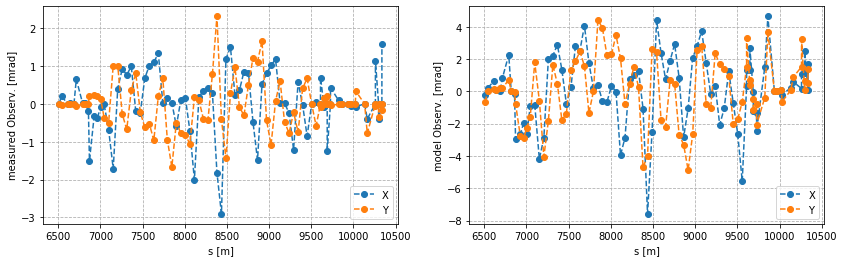

In [221]:
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(14, 4)) #initialize a double plot

#first plot - measured observable
plt1.plot(BPMs_arc_s[:len(BPMs_arc_s)-4], PHI_meas_x_list, label='X', marker='o', linestyle='dashed')
plt1.plot(BPMs_arc_s[:len(BPMs_arc_s)-4], PHI_meas_y_list, label='Y', marker='o', linestyle='dashed')
plt1.legend(loc="lower right")
plt1.grid(linestyle='--')
plt1.set_xlabel('s [m]')
plt1.set_ylabel('measured Observ. [mrad]')

#second plot - modeled observable
plt2.plot(BPMs_arc_s[:len(BPMs_arc_s)-4], PHI_mod_x_list, label='X', marker='o', linestyle='dashed')
plt2.plot(BPMs_arc_s[:len(BPMs_arc_s)-4], PHI_mod_y_list, label='Y', marker='o', linestyle='dashed')
plt2.legend(loc="lower right")
plt2.grid(linestyle='--')
plt2.set_xlabel('s [m]')
plt2.set_ylabel('model Observ. [mrad]')

plt.savefig('measured_model_observable.png', dpi=300)